<a href="https://colab.research.google.com/github/Gustavo-2212/Ciencia-de-Dados-Aplicacao/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
# /content/drive/MyDrive/PYTHON - Intensivão/Aula 03/.dataset/
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

In [60]:
meses = {'jan': 1, 'fev': 2, 'mar': 3, 'abr': 4, 'mai': 5, 'jun': 6, 'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dez': 12}

caminho_bases = pathlib.Path('/content/drive/MyDrive/PYTHON - Intensivão/Aula 03/.dataset')

base_airbnb = pd.DataFrame()

for arquivo in caminho_bases.iterdir():  
  nome_mes = arquivo.name[:3]
  mes = meses[nome_mes]

  ano = arquivo.name[-8:]
  ano = int(ano.replace('.csv', ''))

  df = pd.read_csv(caminho_bases / arquivo.name, low_memory=False)
  df['ano'] = ano
  df['mes'] = mes
  base_airbnb = base_airbnb.append(df)

display(base_airbnb)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,ano,mes,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,14063,https://www.airbnb.com/rooms/14063,20180414160018,2018-04-14,Living in a Postcard,"Besides the most iconic's view, our apartment ...",NaN,"Besides the most iconic's view, our apartment ...",none,Best and favorite neighborhood of Rio. Perfect...,NaN,Everything is there. METRO is 5 min walk. Dir...,NaN,NaN,strictly no smoking in the apartment ! We want...,NaN,NaN,https://a0.muscache.com/im/pictures/66421/ae9b...,NaN,53598,https://www.airbnb.com/users/show/53598,Shalev,2009-11-12,FL,"Hello , my name is Shalev , I am an orchestra ...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/53598/profile...,https://a0.muscache.com/im/users/53598/profile...,Botafogo,1.0,1.0,"['email', 'phone', 'reviews', 'jumio']",t,t,"Rio de Janeiro, RJ, Brazil",Botafogo,Botafogo,...,365,7 weeks ago,t,28,58,88,363,2018-04-14,38,2010-01-03,2018-03-04,91.0,9.0,9.0,9.0,9.0,9.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.38,2018,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17878,https://www.airbnb.com/rooms/17878,20180414160018,2018-04-14,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,NaN,Excellent location. Close to all major public ...,The entire apartment is yours. It is a vacatio...,I will be available throughout your stay shoul...,Please leave the apartment in a clean fashion ...,NaN,NaN,https://a0.muscache.com/im/pictures/65320518/3...,NaN,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, Rio de Janeiro, Brazil",I used to work as a journalist all around the ...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/67b13cea-8...,https://a0.muscache.com/im/pictures/67b13cea-8...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews']",t,f,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,...,90,yesterday,t,11,29,58,286,2018-04-14,205,2010-07-15,2018-04-10,93.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,f,strict,f,f,1,2.17,2018,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24480,https://www.airbnb.com/rooms/24480,20180414160018,2018-04-14,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,The studio is located at Vinicius de Moraes St...,My studio is located in the best of Ipanema. ...,none,"The beach, the lagoon, Ipanema is a great loca...","O prédio é bastante simples , mas o apartament...",NaN,"From the International airport, take a regula...",Os hóspedes podem perguntar por email sua

In [61]:
print(list(base_airbnb.columns))
base_airbnb.head(1000).to_csv('primeiros_registros.csv', sep=';')

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

In [62]:
# Colunas julgadas importantes para resolução do desafio
colunas = ['host_response_time','host_response_rate','host_is_superhost','host_listings_count','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','ano','mes']

base_airbnb = base_airbnb.loc[:, colunas]
print(list(base_airbnb.columns))
display(base_airbnb)

['host_response_time', 'host_response_rate', 'host_is_superhost', 'host_listings_count', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 'ano', 'mes']


,host_response_time,host_response_rate,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,ano,mes
0,NaN,NaN,f,1.0,-22.946854,-43.182737,Apartment,Entire home/apt,4,1.0,0.0,2.0,Real Bed,"{TV,Internet,""Air conditioning"",Kitchen,Doorma...",$133.00,"$1,025.00",$102.00,2,$34.00,60,365,38,91.0,9.0,9.0,9.0,9.0,9.0,9.0,f,f,strict_14_with_grace_period,2018,4
1,within an hour,100%,t,2.0,-22.965919,-43.178962,Condominium,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$270.00,$0.00,$273.00,2,$51.00,4,90,205,93.0,10.0,9.0,10.0,10.0,9.0,9.0,t,f,strict,2018,4
2,within an hour,100%,f,1.0,-22.985698,-43.201935,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",""First ...",$222.00,$851.00,$211.00,2,$215.00,3,90,85,95.0,10.0,10.0,10.0,10.0,10.0,9.0,f,f,strict,2018,4
3,within an hour,100%,f,3.0,-22.977117,-43.190454,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$161.00,"$1,000.00",$220.00,2,$45.00,4,30,208,94.0,9.0,10.0,10.0,10.0,10.0,9.0,f,f,strict,2018,4
4,within an hour,100%,t,1.0,-22.983024,-43.214270,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$222.00,NaN,$85.00,2,$68.00,2,1125,200,96.0,10.0,10.0,10.0,10.0,10.0,9.0,t,f,strict,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33719,NaN,NaN,f,1.0,-22.899220,-43.178120,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets allo...",$66.00,NaN,NaN,1,$0.00,1,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,flexible,2019,10
33720,NaN,NaN,f,1.0,-23.011160,-43.371090,Apartment,Entire home/apt,4,1.0,2.0,4.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",$189.00,NaN,NaN,1,$0.00,2,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,flexible,2019,10
33721,NaN,NaN,f,0.0,-22.967730,-43.390940,Apartment,Entire home/apt,6,2.0,2.0,4.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",$181.00,$0.00,$45.00,1,$90.00,2,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,moderate,2019,10
33722,NaN,NaN,f,1.0,-23.002890,-43.390960,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets allo...",$127.00,NaN,NaN,1,$0.00,1,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,flexible,2019,10


In [63]:
# Excluindo colunas(colunas com mais de 300000 dados NaN) e linhas com dados NaN
for coluna in base_airbnb:
  if base_airbnb[coluna].isnull().sum() > 300000:
    base_airbnb = base_airbnb.drop(coluna, axis=1)

print(base_airbnb.isnull().sum())

host_response_time          271919
host_response_rate          271922
host_is_superhost              348
host_listings_count            348
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
bathrooms                     1222
bedrooms                       677
beds                          2159
bed_type                         0
amenities                        0
price                            0
security_deposit            296919
cleaning_fee                220577
guests_included                  0
extra_people                     0
minimum_nights                   0
maximum_nights                   0
number_of_reviews                0
instant_bookable                 0
is_business_travel_ready         0
cancellation_policy              0
ano                              0
mes                              0
dtype: int64


In [64]:
base_airbnb = base_airbnb.dropna()

print(base_airbnb.shape)
print(base_airbnb.isnull().sum())

(230994, 27)
host_response_time          0
host_response_rate          0
host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
security_deposit            0
cleaning_fee                0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
ano                         0
mes                         0
dtype: int64


In [65]:
# Verificando os tipos de dados em cada coluna (garante que o Python leia int como int e não como String)
print(base_airbnb.dtypes)
print('-'*60)
print(base_airbnb.iloc[0])

host_response_time           object
host_response_rate           object
host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
security_deposit             object
cleaning_fee                 object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object
--------------

In [66]:
# Note que pelo comando acima, 'price' e 'extra people' estão sendo 
# reconhecidos como objetos, no entanto são, respectivamente, float e int

#price
base_airbnb['price'] = base_airbnb['price'].str.replace('$', '')
base_airbnb['price'] = base_airbnb['price'].str.replace(',', '')
base_airbnb['price'] = base_airbnb['price'].astype(np.float32, copy=False)

#extra people
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$', '')
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace(',', '')
base_airbnb['extra_people'] = base_airbnb['extra_people'].astype(np.float32, copy=False)

#host_response_rate
base_airbnb['host_response_rate'] = base_airbnb['host_response_rate'].str.replace('%', '')
base_airbnb['host_response_rate'] = base_airbnb['host_response_rate'].str.replace(',', '')
base_airbnb['host_response_rate'] = base_airbnb['host_response_rate'].astype(np.float32, copy=False)

#security_deposit
base_airbnb['security_deposit'] = base_airbnb['security_deposit'].str.replace('$', '')
base_airbnb['security_deposit'] = base_airbnb['security_deposit'].str.replace(',', '')
base_airbnb['security_deposit'] = base_airbnb['security_deposit'].astype(np.float32, copy=False)

#cleaning_fee
base_airbnb['cleaning_fee'] = base_airbnb['cleaning_fee'].str.replace('$', '')
base_airbnb['cleaning_fee'] = base_airbnb['cleaning_fee'].str.replace(',', '')
base_airbnb['cleaning_fee'] = base_airbnb['cleaning_fee'].astype(np.float32, copy=False)

print(base_airbnb.dtypes)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regu

host_response_time           object
host_response_rate          float32
host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
security_deposit            float32
cleaning_fee                float32
guests_included               int64
extra_people                float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object


# **Análise Exploratória e Tratar Outliers**

Outliers (dados que diferem drasticamente de outros) = excluir valores que seguem a regra (valores < Q1 - 1.5*Amplitude) e (valores > Q3 + 1.5*Amplitude), onde Amplitude = Q3 - Q1



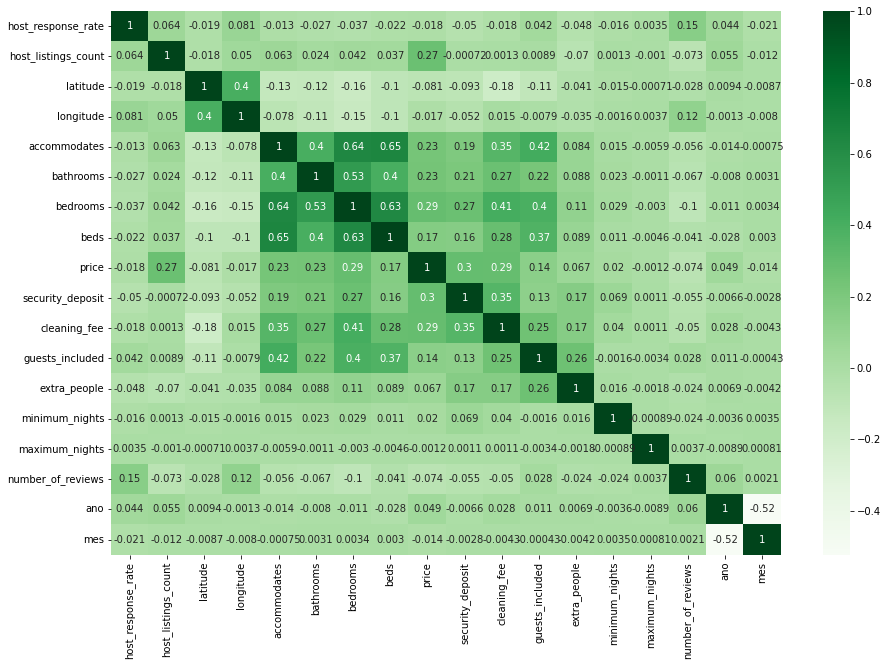

In [67]:
plt.figure(figsize=(15, 10))
sns.heatmap(base_airbnb.corr(), annot=True, cmap='Greens')
#print(base_airbnb.corr())

In [68]:
def limites(coluna):
  q1 = coluna.quantile(0.25)
  q3 = coluna.quantile(0.75)
  amplitude = q3 - q1

  return q1 - 1.5*amplitude, q3 + 1.5*amplitude

def excluir_outliers(df, nome_coluna):
  qtde_linhas = df.shape[0]
  lim_inf, lim_sup = limites(df[nome_coluna])
  df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
  linhas_removidas = qtde_linhas - df.shape[0]

  return df, linhas_removidas

def diagrama_caixa(coluna):
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(15, 5)
  sns.boxplot(x=coluna, ax=ax1)
  ax2.set_xlim(limites(coluna))
  sns.boxplot(x=coluna, ax=ax2)

def histograma(coluna):
  plt.figure(figsize=(15, 5))
  sns.distplot(coluna, hist=True)

def grafico_barra(coluna):
  plt.figure(figsize=(15, 5))
  ax = sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts())
  ax.set_xlim(limites(coluna))

# **Análise da coluna Preço (price)** 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



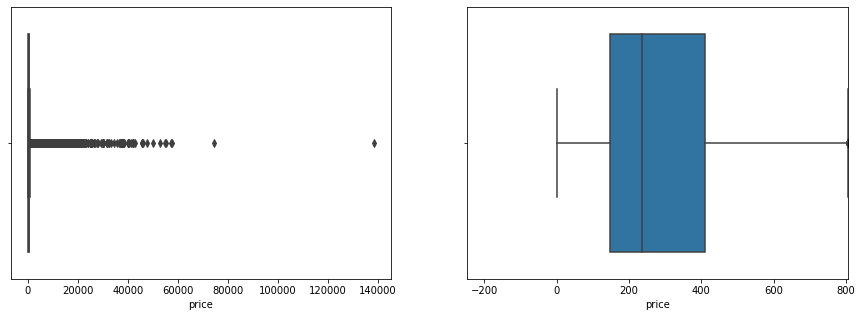

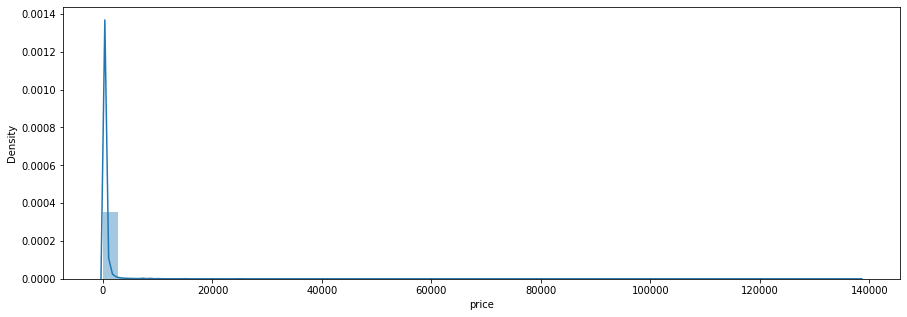

In [69]:
#price
diagrama_caixa(base_airbnb['price'])
histograma(base_airbnb['price'])

In [70]:
# Como o objetivo é um modelo para imóveis comuns, os valores acima do limite superior
# podem ser excluídos, por provavelmente se tratarem de apartamentos de altíssimo luxo
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'price')
print(f'{linhas_removidas} linhas removidas')

22559 linhas removidas


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



(208435, 27)


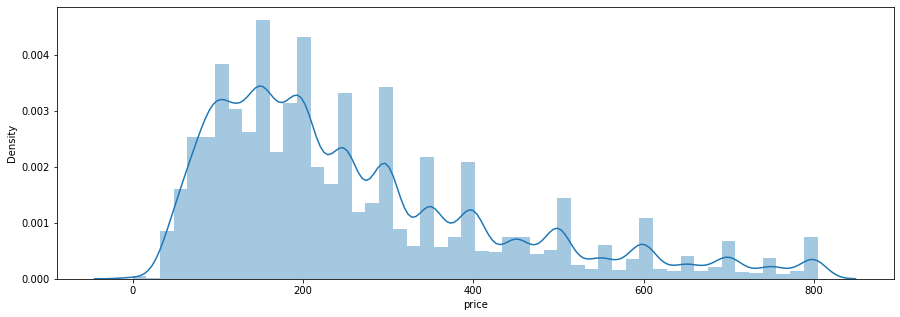

In [71]:
histograma(base_airbnb['price'])
print(base_airbnb.shape)

# **Análise da coluna Pessoas Extras (extra_people)**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



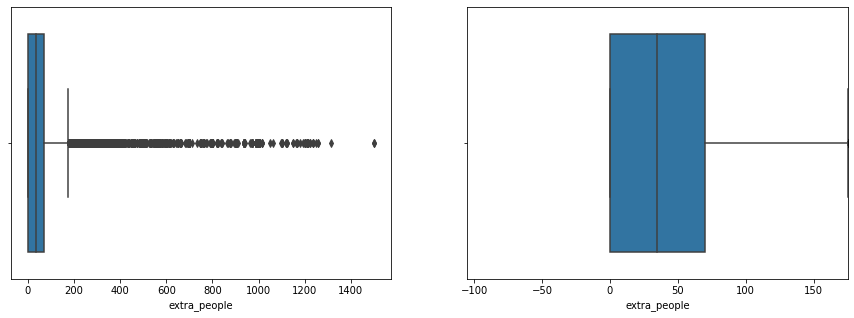

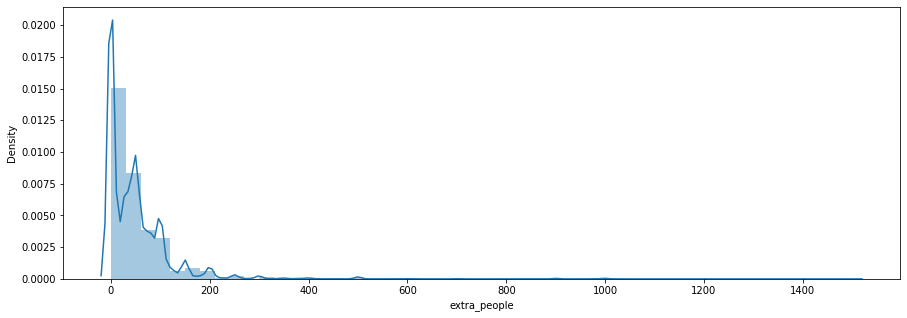

In [72]:
#extra_people
diagrama_caixa(base_airbnb['extra_people'])
histograma(base_airbnb['extra_people'])

In [73]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'extra_people')
print(f'{linhas_removidas} linhas removidas')

8929 linhas removidas


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



(199506, 27)


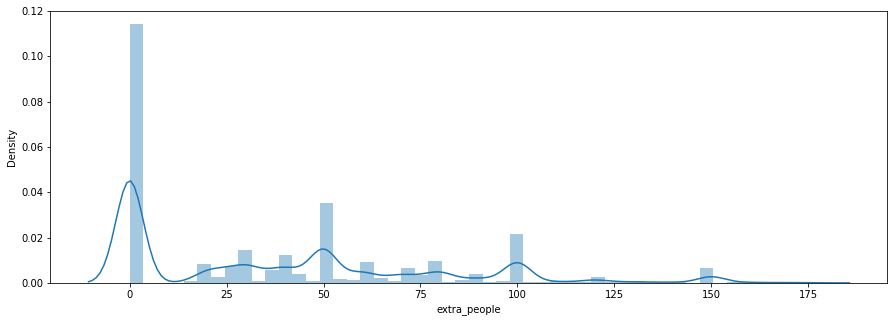

In [74]:
histograma(base_airbnb['extra_people'])
print(base_airbnb.shape)

# **Análise da coluna Lista da Contagem de Hosts (host_listings_count)**

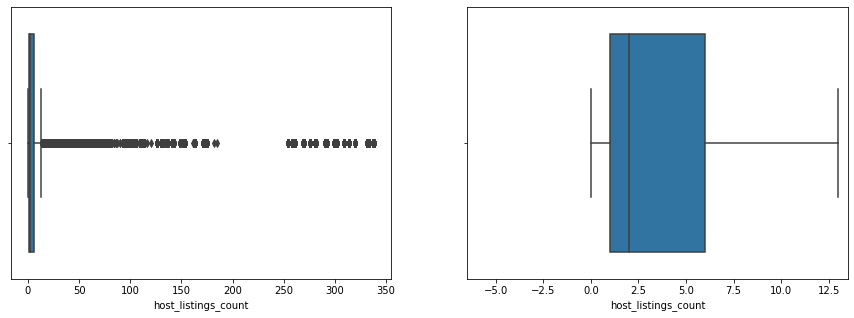

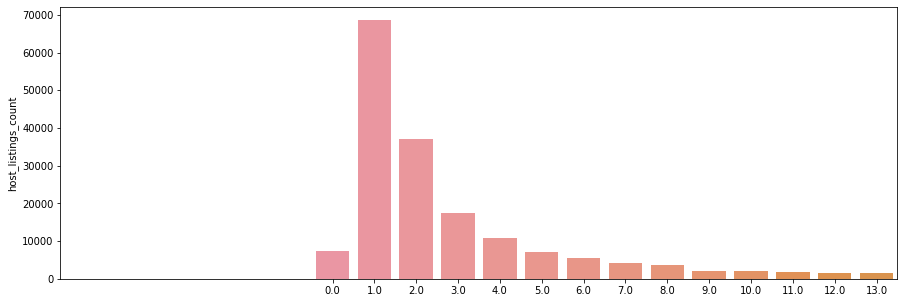

In [75]:
#host_listings_count
diagrama_caixa(base_airbnb['host_listings_count'])
grafico_barra(base_airbnb['host_listings_count'])

In [76]:
# Podemos excluir os outliers, porque para o nosso objetivo hosts com
# mais de 6 imóveis no airbnb não é o público alvo (pode ser que sejam imobiliários
# ou profissionais que gerenciam imóveis no airbnb)
base_aibnb, linhas_removidas = excluir_outliers(base_airbnb, 'host_listings_count')
print(f'{linhas_removidas} linhas removidas')

28513 linhas removidas


# **Análise da coluna Acomodados (accommodates)**

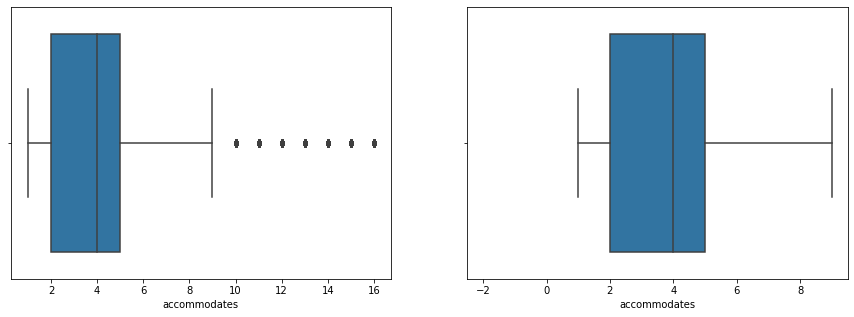

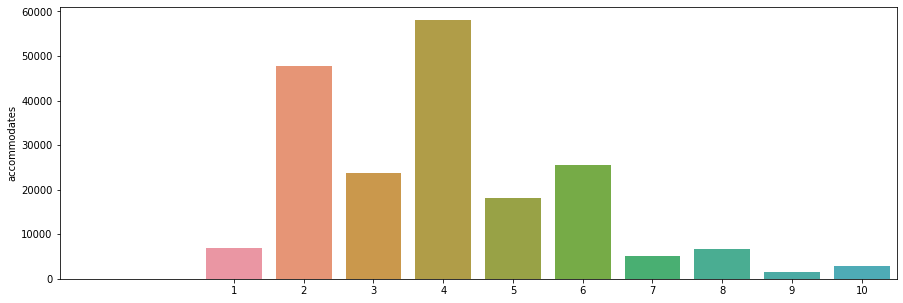

In [77]:
#accommodates
diagrama_caixa(base_airbnb['accommodates'])
grafico_barra(base_airbnb['accommodates'])

In [78]:
# Apartamentos com mais de 9 pessoas não são o nosso foco
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'accommodates')
print(f'{linhas_removidas} linhas removidas')

5902 linhas removidas


# **Análise da coluna Banheiros (bathrooms)**

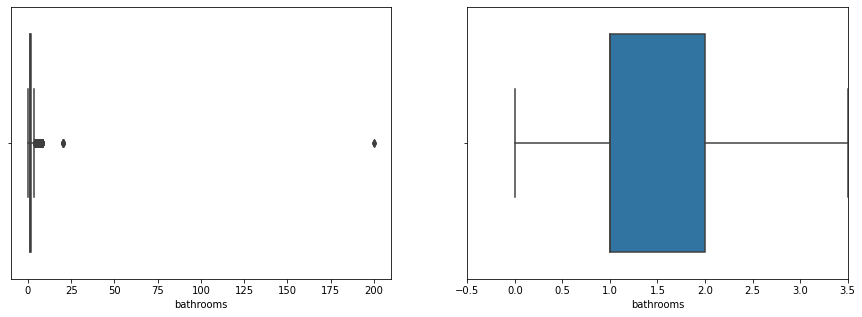

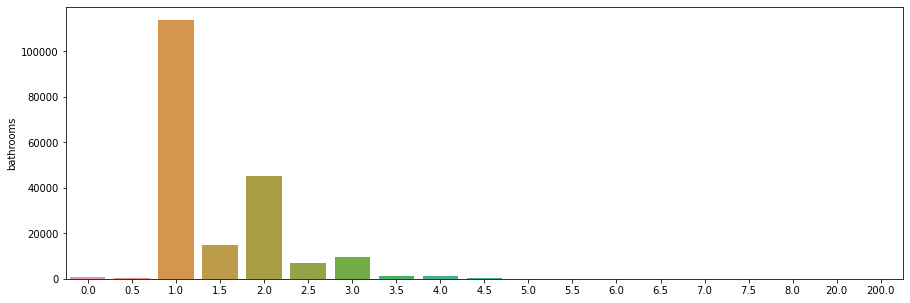

In [79]:
#bathrooms
diagrama_caixa(base_airbnb['bathrooms'])
plt.figure(figsize=(15, 5))
sns.barplot(x=base_airbnb['bathrooms'].value_counts().index, y=base_airbnb['bathrooms'].value_counts())

In [80]:
# Pelo mesmo motivo que os anteriores vamos excluir os outliers
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'bathrooms')
print(f'{linhas_removidas} linhas removidas')

1713 linhas removidas


# **Análise da coluna Quartos (bedrooms)**

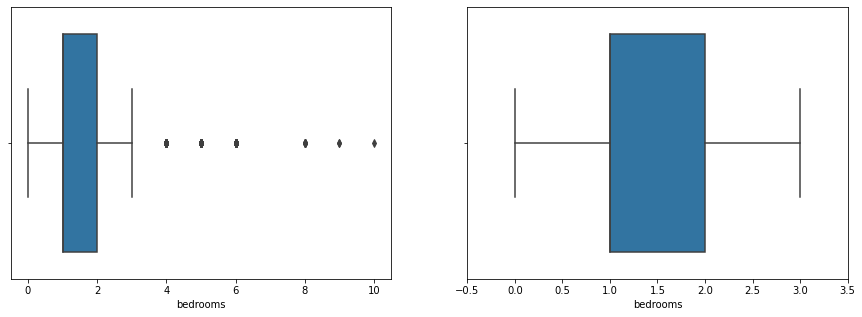

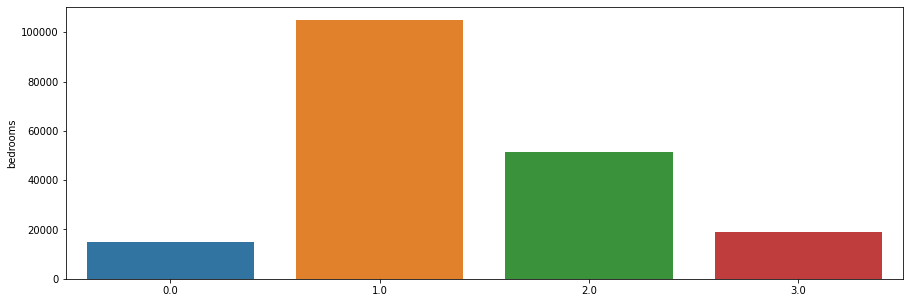

In [81]:
#bedrooms
diagrama_caixa(base_airbnb['bedrooms'])
grafico_barra(base_airbnb['bedrooms'])

In [82]:
# Pelo mesmos motivos anteriores, vamos excluir os outliers
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'bedrooms')
print(f'{linhas_removidas} linhas removidas')

1564 linhas removidas


# **Análise da coluna Camas (beds)**

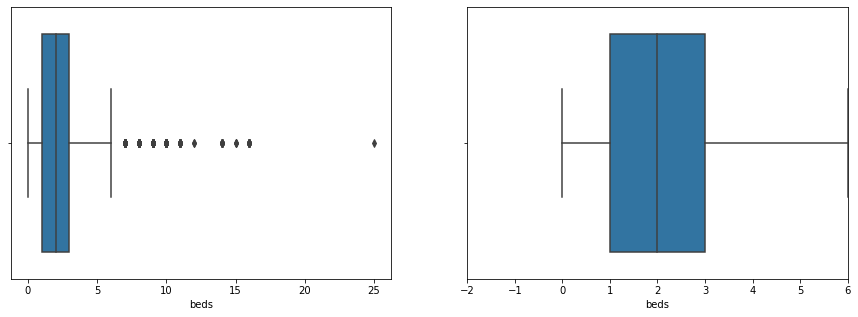

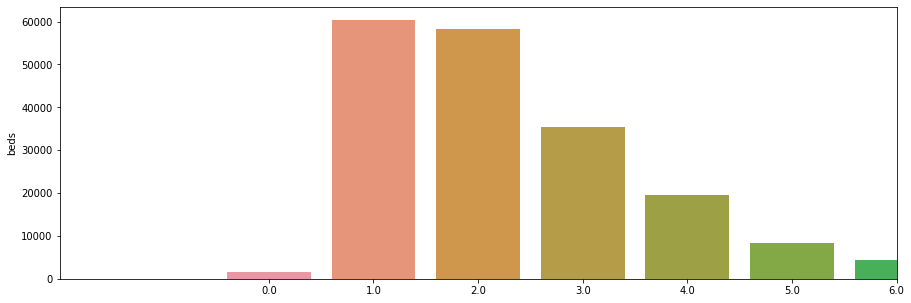

In [83]:
#beds
diagrama_caixa(base_airbnb['beds'])
grafico_barra(base_airbnb['beds'])

In [84]:
# Pelos mesmos motivos anteriores, vamos excluir os outliers
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'beds')
print(f'{linhas_removidas} linhas removidas')

2532 linhas removidas


# **Análise da coluna Convidados Incluído (guests_included)**

(-0.5, 3.5)


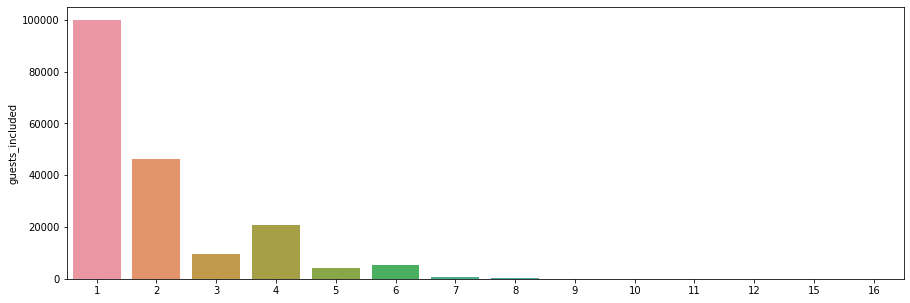

In [85]:
#guests_included

#diagrama_caixa(base_airbnb['guests_included'])
#grafico_barra(base_airbnb['guests_included'])
print(limites(base_airbnb['guests_included']))
plt.figure(figsize=(15, 5))
sns.barplot(x=base_airbnb['guests_included'].value_counts().index, y=base_airbnb['guests_included'].value_counts())

In [86]:
# Vamos excluir essa feature da análise. Parece que os usuários do airbnb usam muito o
# valor padrão do airbnb como 1 guest included. Isso pode levar o nosso modelo a considerar
# uma feature que na verdade não é essencial para a definição do preço
base_airbnb = base_airbnb.drop('guests_included', axis=1)
base_airbnb.shape

(187795, 26)

# **Análise da coluna Mínimo de Noites (minimum_nights)**

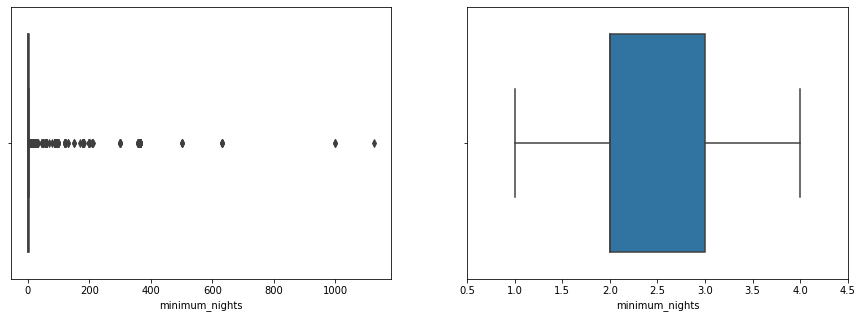

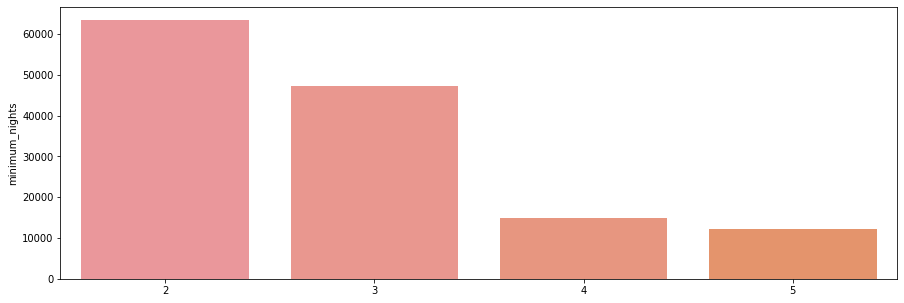

In [87]:
#minimum_nights
diagrama_caixa(base_airbnb['minimum_nights'])
grafico_barra(base_airbnb['minimum_nights'])

In [88]:
# Apartamentos com mais de 8 noites como 'mínimo de noites' podem ser apartamentos
# de temporada ou ainda apartamentos para morar. Não é o nosso objetivo(preço para clientes comuns)
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'minimum_nights')
print(f'{linhas_removidas} linhas removidas')

22681 linhas removidas


# **Análise da coluna Máximo de Noites (maximum_nights)**

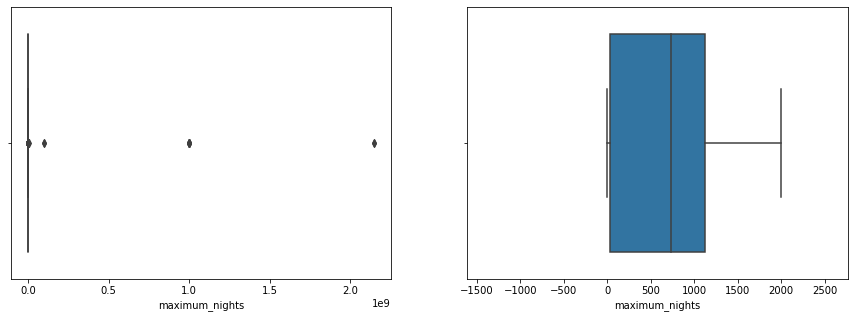

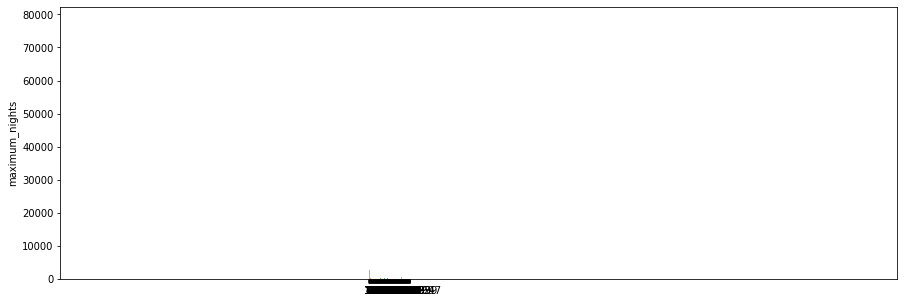

In [89]:
#maximum_nights
diagrama_caixa(base_airbnb['maximum_nights'])
grafico_barra(base_airbnb['maximum_nights'])

In [90]:
# Essa coluna não ajuda na análise, pois a maioria dos hosts não preenchem esse campo de 'maximum nights'
# Por isso vamos excluir a coluna da análise, e não apenas outliers
base_airbnb = base_airbnb.drop('maximum_nights', axis=1)
base_airbnb.shape

(165114, 25)

# **Análise da coluna Número de Avaliações (number_of_reviews)**

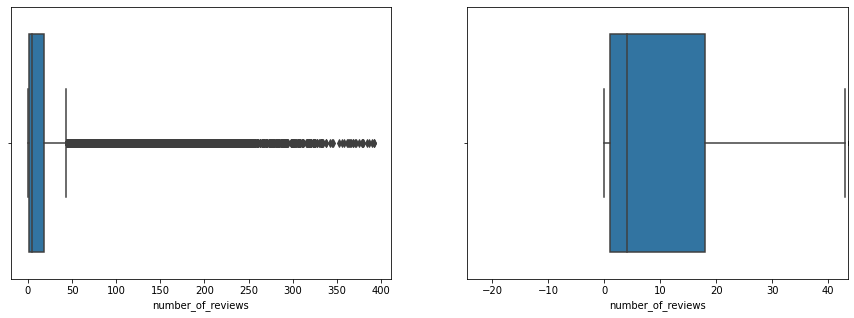

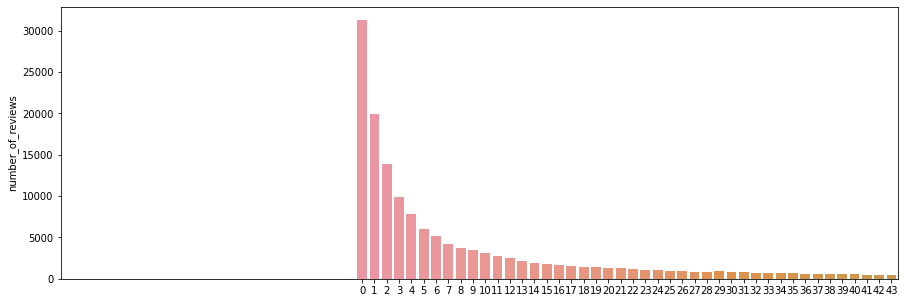

In [91]:
#number_of_reviews
diagrama_caixa(base_airbnb['number_of_reviews'])
grafico_barra(base_airbnb['number_of_reviews'])

In [92]:
# Esse caso é meio duvidoso os caminhos que podemos tomar, precisamos de uma análise mais acurada
# Exemplo de análise: 
# 1) -Se excluirmos os outliers, vamos excluir as pessoas que tem a maior quantidade de avaliações(reviews)
#    (o que normalmente são os host que têm mais aluguel). Isso pode impactar muito negativamente no nosso modelo
# 2) -Pensando no nosso objetivo, se eu tenho um imóvel parado e quero colocar meu imóvel, é claro
#     que não tenho avaliação nenhuma. Então, talvez tirar essa coluna da análise pde na verdade acabar ajudando

base_airbnb = base_airbnb.drop('number_of_reviews', axis=1)
base_airbnb.shape

(165114, 24)

# **Tratamento de Colunas de Valores de Texto**


**Coluna: property_type**

Apartment                 127747
Condominium                10744
House                       9709
Serviced apartment          6081
Loft                        4511
Guest suite                 1281
Guesthouse                   750
Bed and breakfast            733
Hostel                       662
Hotel                        560
Aparthotel                   558
Townhouse                    465
Other                        285
Villa                        208
Chalet                       188
Boutique hotel               169
Tiny house                   117
Earth house                   52
Bungalow                      47
Cottage                       42
Dorm                          32
Nature lodge                  29
Island                        28
Treehouse                     27
Cabin                         18
Casa particular (Cuba)        16
Campsite                      11
Hut                            9
Tipi                           6
Yurt                           6
Dome house

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



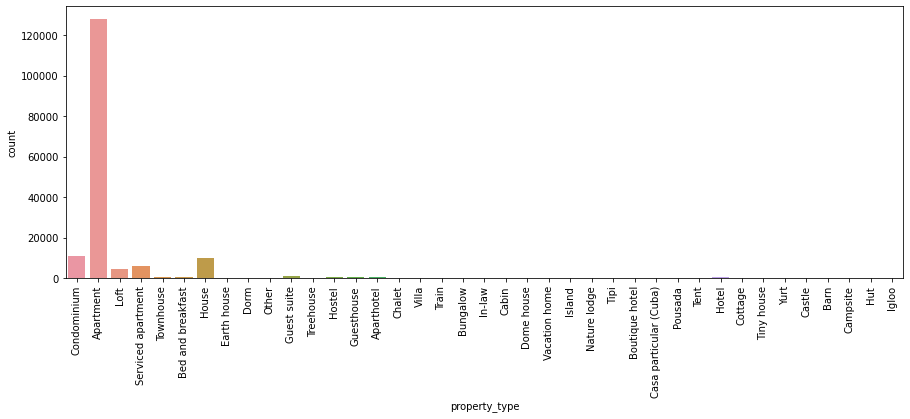

In [93]:
print(base_airbnb['property_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot('property_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

['Guest suite', 'Guesthouse', 'Bed and breakfast', 'Hostel', 'Hotel', 'Aparthotel', 'Townhouse', 'Other', 'Villa', 'Chalet', 'Boutique hotel', 'Tiny house', 'Earth house', 'Bungalow', 'Cottage', 'Dorm', 'Nature lodge', 'Island', 'Treehouse', 'Cabin', 'Casa particular (Cuba)', 'Campsite', 'Hut', 'Tipi', 'Yurt', 'Dome house', 'Barn', 'Igloo', 'Pousada', 'Vacation home', 'Train', 'Tent', 'Castle', 'In-law']
Apartment             127747
Condominium            10744
House                   9709
Outros                  6322
Serviced apartment      6081
Loft                    4511
Name: property_type, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



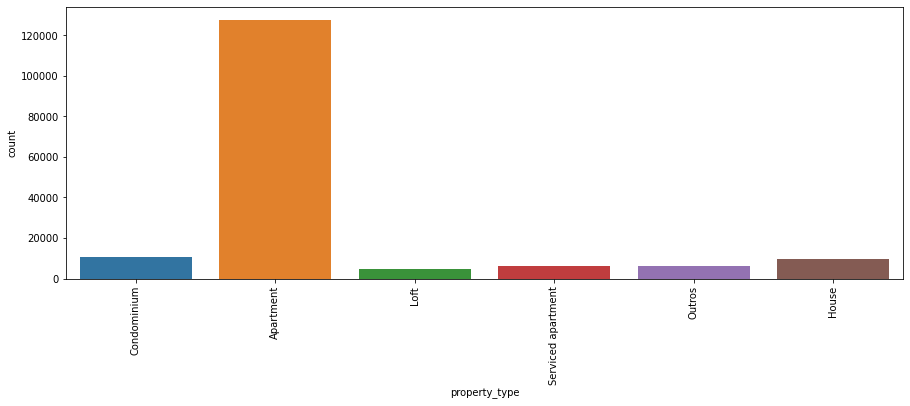

In [94]:
# Aqui nós não vamos excluir outliers, mas sim agrupar valores que são muito pequenos
# Todos os tipos de propriedade que têm menos de 2000 propriedades na base de dados
# , vamos agrupar em um grupo chamado 'outro'
tabela_tipos_casa = base_airbnb['property_type'].value_counts()
colunas_agrupar = []

for tipo in tabela_tipos_casa.index:
  if tabela_tipos_casa[tipo] < 2000:
    colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
  base_airbnb.loc[base_airbnb['property_type']==tipo, 'property_type'] = 'Outros'

print(base_airbnb['property_type'].value_counts())
plt.figure(figsize=(15, 5))
grafico = sns.countplot('property_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

**Coluna: room_type**

Entire home/apt    123580
Private room        38202
Shared room          2392
Hotel room            940
Name: room_type, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



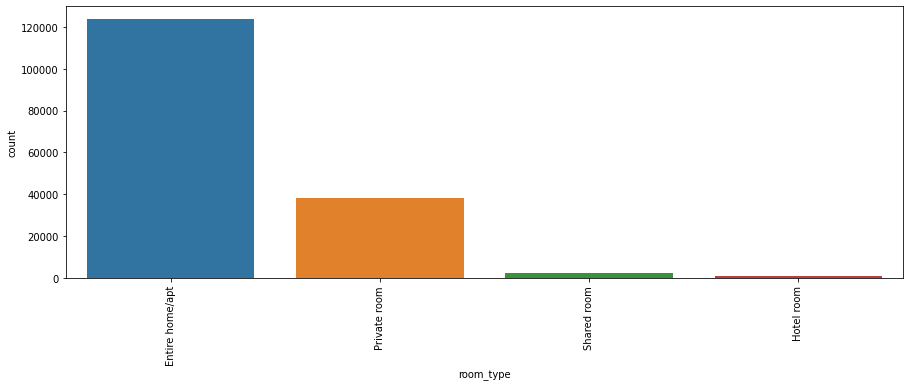

In [95]:
# Note que o grafico ficou bem distribuído, portanto não é necessário
# modificá-lo
print(base_airbnb['room_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot('room_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

**Coluna: bed_type**

Real Bed         163236
Pull-out Sofa      1378
Futon               387
Couch                59
Airbed               54
Name: bed_type, dtype: int64
['Pull-out Sofa', 'Futon', 'Couch', 'Airbed']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Real Bed    163236
Outros        1878
Name: bed_type, dtype: int64


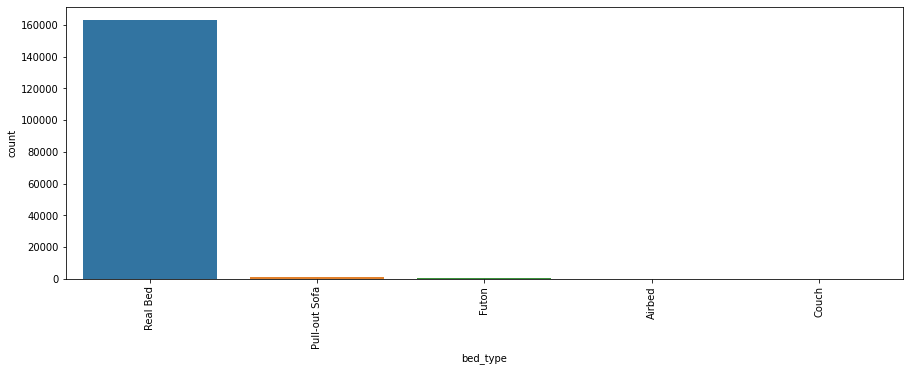

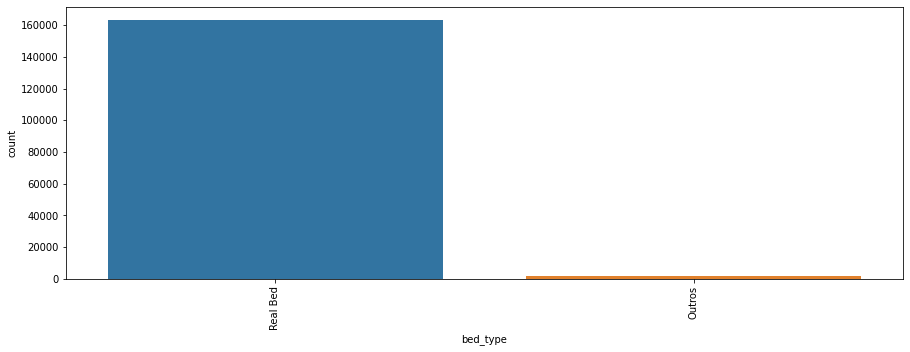

In [96]:
print(base_airbnb['bed_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot('bed_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

# agrupando categorias de bed_type
tabela_bed = base_airbnb['bed_type'].value_counts()
colunas_agrupar = []

for tipo in tabela_bed.index:
  if tabela_bed[tipo] < 10000:
    colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
  base_airbnb.loc[base_airbnb['bed_type']==tipo, 'bed_type'] = 'Outros'

print(base_airbnb['bed_type'].value_counts())
plt.figure(figsize=(15, 5))
grafico = sns.countplot('bed_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

**Coluna: cancellation_policy**

strict_14_with_grace_period    80347
flexible                       37726
moderate                       36844
strict                          5131
super_strict_60                 3585
super_strict_30                 1481
Name: cancellation_policy, dtype: int64
['strict', 'super_strict_60', 'super_strict_30']
strict_14_with_grace_period    80347
flexible                       37726
moderate                       36844
strict                         10197
Name: cancellation_policy, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



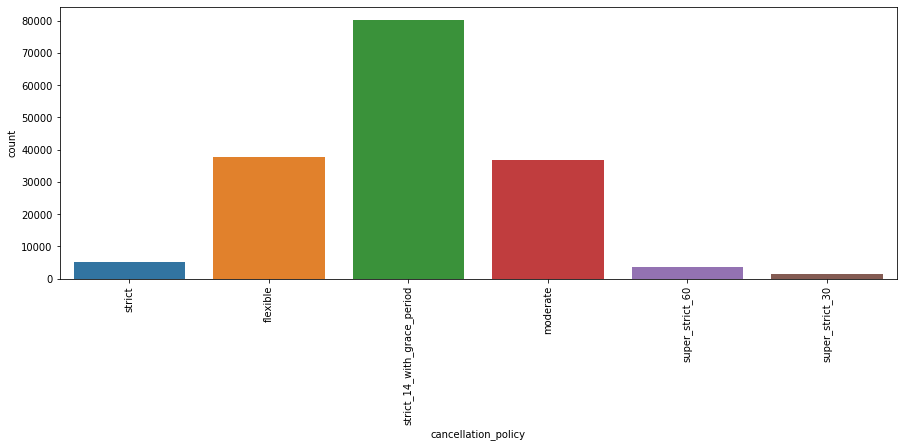

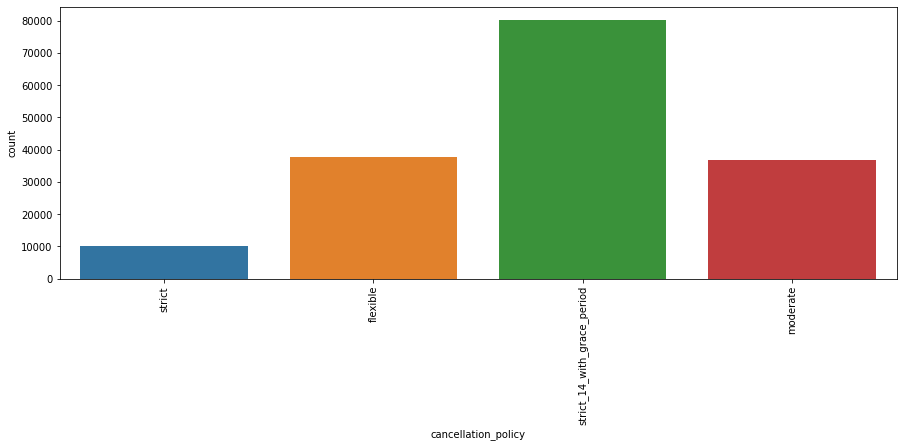

In [97]:
print(base_airbnb['cancellation_policy'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot('cancellation_policy', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

# agrupando categorias de cancellation_policy
tabela_cancellation = base_airbnb['cancellation_policy'].value_counts()
colunas_agrupar = []

for tipo in tabela_cancellation.index:
  if tabela_cancellation[tipo] < 10000:
    colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
  base_airbnb.loc[base_airbnb['cancellation_policy']==tipo, 'cancellation_policy'] = 'strict'

print(base_airbnb['cancellation_policy'].value_counts())
plt.figure(figsize=(15, 5))
grafico = sns.countplot('cancellation_policy', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

**Coluna: amenities**

In [98]:
# Como temos uma diversidade muito grade de amenities('facilidades') e, às vezes,
# as mesmas facilidades podem ser escritas de forma diferente, vamos avaliar a quantidade
# de facilidades como parâmetro para o nosso modelo

print(base_airbnb['amenities'].iloc[1].split(','))
print(len(base_airbnb['amenities'].iloc[1].split(',')))

base_airbnb['n_amenities'] = base_airbnb['amenities'].str.split(',').apply(len)

['{TV', '"Cable TV"', 'Internet', 'Wifi', '"Air conditioning"', 'Kitchen', 'Doorman', 'Elevator', '"Buzzer/wireless intercom"', '"Family/kid friendly"', 'Hangers', '"Hair dryer"', 'Iron', '"Laptop friendly workspace"}']
14


In [99]:
base_airbnb = base_airbnb.drop('amenities', axis=1)
base_airbnb.shape

(165114, 24)

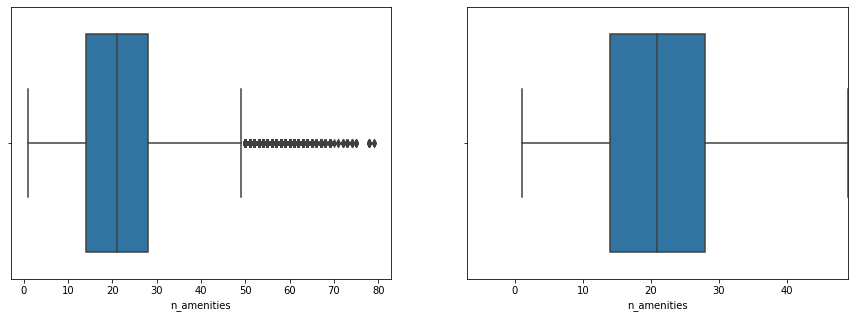

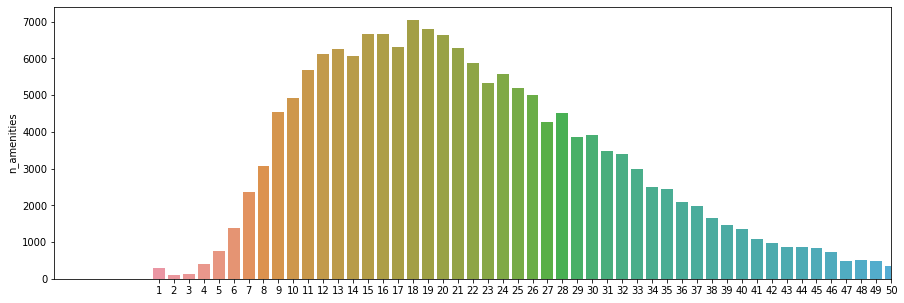

In [100]:
diagrama_caixa(base_airbnb['n_amenities'])
grafico_barra(base_airbnb['n_amenities'])

In [101]:
# Essa coluna virou uma de valor numérico, e como todas as outras colunas de valores
# numéricos, vamos excluir outliers
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'n_amenities')
print(f'{linhas_removidas} linhas removidas')

2876 linhas removidas


# **Visualização de Mapa das Propriedades**



In [103]:
amostra = base_airbnb.sample(n=50000)
centro_mapa = {'lat':amostra.latitude.mean(), 'lon':amostra.longitude.mean()}
mapa = px.density_mapbox(amostra, lat='latitude', lon='longitude',z='price', radius=2.5,
                        center=centro_mapa, zoom=10,
                        mapbox_style='stamen-terrain')
mapa.show()

# **Encoding**

  Precisamos Ajustar as Features para facilitar o trabalho do modelo futuro (features de categoria, true e false, etc.)

*   Features de Valores True ou False, vamos substituir por 1 e 0, respectivamente
*   Features de Categoria (features em que os valores da coluna são textos) vamos utilizar o método **encoding** de variáveis **dummies**









In [114]:
colunas_tf = ['host_is_superhost', 'instant_bookable', 'is_business_travel_ready']
base_airbnb_cod = base_airbnb.copy()
for coluna in colunas_tf:
  base_airbnb_cod.loc[base_airbnb_cod[coluna]=='t', coluna] = 1
  base_airbnb_cod.loc[base_airbnb_cod[coluna]=='f', coluna] = 0

In [115]:
colunas_categorias = ['property_type', 'room_type', 'cancellation_policy', 'bed_type', 'host_response_time']
base_airbnb_cod = pd.get_dummies(data=base_airbnb_cod, columns=colunas_categorias)
display(base_airbnb_cod.head())

,host_response_rate,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,extra_people,minimum_nights,instant_bookable,is_business_travel_ready,ano,mes,n_amenities,property_type_Apartment,property_type_Condominium,property_type_House,property_type_Loft,property_type_Outros,property_type_Serviced apartment,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,bed_type_Outros,bed_type_Real Bed,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
1,100.0,1,2.0,-22.965919,-43.178962,5,1.0,2.0,2.0,270.0,0.0,273.0,51.0,4,1,0,2018,4,25,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
3,100.0,0,3.0,-22.977117,-43.190454,3,1.0,1.0,2.0,161.0,1000.0,220.0,45.0,4,0,0,2018,4,14,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
5,100.0,1,1.0,-22.988165,-43.193588,3,1.5,1.0,2.0,308.0,856.0,158.0,86.0,2,0,0,2018,4,30,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
6,100.0,1,1.0,-22.981269,-43.190457,2,1.0,1.0,2.0,219.0,400.0,140.0,80.0,3,1,0,2018,4,30,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
8,100.0,0,3.0,-22.921990,-43.183836,3,1.0,0.0,2.0,120.0,2049.0,512.0,0.0,3,0,0,2018,4,14,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0


# **Modelo de Previsão**

* Métricas de Avaliação

  * Vamos usar o **R²** que vai nos dizer o quão bem o nosso modelo consegue explicar o preço. Isso seria um ótimo parâmetro para ver o quão bom é o nosso modelo. (Quanto mais próximo de 100%, melhor)

  * Vamos calcular também o **Erro Quadrático Médio**, que vai mostrar para gente o quanto o nosso modelo está errando. (Quanto menor o erro, melhor)

In [116]:
def avaliar_modelo(nome_modelo, y_teste, previsao):
  r2 = r2_score(y_teste, previsao)
  RSME = np.sqrt(mean_squared_error(y_teste, previsao))

  return f'Modelo {nome_modelo}:\nR²:{r2:.2%}\nRSME:{RSME:.2f}'

* Escolha dos Modelos a serem testados

      1. RandomForest
      2. LinearRegression
      3. Extra Tree

  Esses são alguns dos modelos que existem para fazer previsão de valores numéricos (o que chamamos de regressão). Estamos querendo calcular o preço, portanto, queremos prever um valor numérico.
  Assim, escolhemos esses 3 modelos, que particularmente são bons para a maioria dos problemas de **Regressão**, de centenas existentes. 

In [117]:
modelo_rf = RandomForestRegressor()
modelo_lr = LinearRegression()
modelo_et = ExtraTreesRegressor()

modelos = {'RandomForest': modelo_rf,
           'LinearRegression': modelo_lr,
           'ExtraTrees': modelo_et,
           }

y = base_airbnb_cod['price']
X = base_airbnb_cod.drop('price', axis=1)

* Separa os dados em treino e teste + Treino do Modelo

  Essa etapa é crucial. As IA's aprendendo com o que chamamos de Treino.
  Basicamente nós separamos as informações em treino e teste, por exemplo: 10% da base de dados vai servir para teste e o restante, 90%, para treino. (Treino costuma ser maior mesmo).


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

for nome_modelo, modelo in modelos.items():
    #treinar
    modelo.fit(X_train, y_train)

    #testar
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo, y_test, previsao))

Modelo RandomForest:
R²:91.09%
RSME:46.75
Modelo LinearRegression:
R²:40.18%
RSME:121.16
Modelo ExtraTrees:
R²:91.56%
RSME:45.52


# **Análise do Melhor Modelo**

In [119]:
for nome_modelo, modelo in modelos.items():
  # testar
  previsao = modelo.predict(X_test)
  print(avaliar_modelo(nome_modelo, y_test, previsao))

Modelo RandomForest:
R²:91.09%
RSME:46.75
Modelo LinearRegression:
R²:40.18%
RSME:121.16
Modelo ExtraTrees:
R²:91.56%
RSME:45.52


* Modelo Escolhido: **ExtraTreesRegressor**

  Esse foi o modelo com *maior* **R²** e *menor* **RSME (Erro Quadrático Médio)**

# **Ajustes e Melhorias no Melhor Modelo**

,0
bedrooms,0.153162
room_type_Entire home/apt,0.080677
latitude,0.076997
bathrooms,0.074006
cleaning_fee,0.066351
extra_people,0.058570
accommodates,0.057977
host_listings_count,0.055707
longitude,0.054549
security_deposit,0.044120


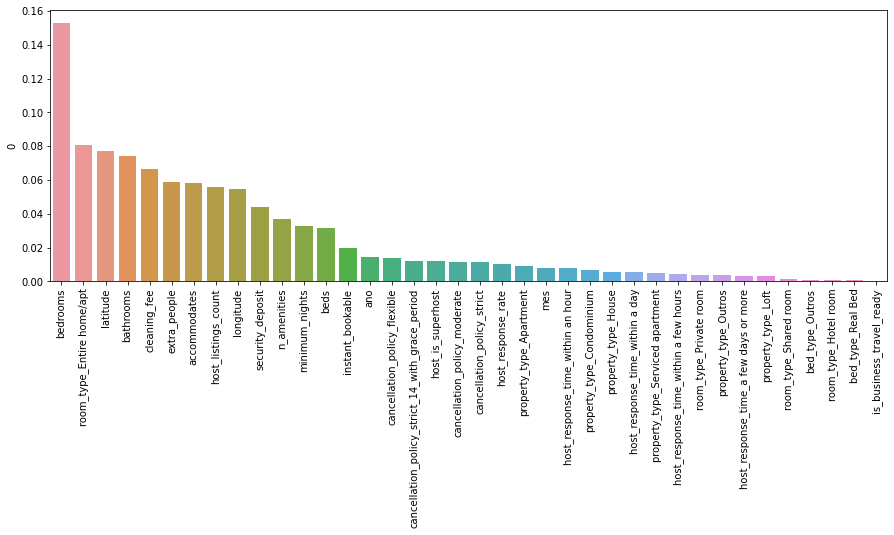

In [120]:
#print(modelo_et.feature_importances_)
#print(X_train.columns)
importancia_features = pd.DataFrame(modelo_et.feature_importances_, X_train.columns)
importancia_features = importancia_features.sort_values(by=0, ascending=False)
display(importancia_features)

plt.figure(figsize=(15, 5))
ax = sns.barplot(x=importancia_features.index, y=importancia_features[0])
ax.tick_params(axis='x', rotation=90)

# **Ajustes Finais no Modelo**

In [121]:
# is_bunsiness_travel_ready não parece ter muito impacto no nosso modelo.
# Por isso, para chegar em um modelo mais simples, vamoms excluir essa feature
# e testar o modelo sem ela

base_airbnb_cod = base_airbnb_cod.drop('is_business_travel_ready', axis=1) 

y = base_airbnb_cod['price']
X = base_airbnb_cod.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

modelo_et.fit(X_train, y_train)
previsao = modelo_et.predict(X_test)
print(avaliar_modelo('ExtraTrees', y_test, previsao))

Modelo ExtraTrees:
R²:91.61%
RSME:45.38


In [122]:
base_teste = base_airbnb_cod.copy()
for coluna in base_teste:
  if 'bed_type' in coluna:
    base_teste = base_teste.drop(coluna, axis=1)
print(base_teste.columns)

y = base_teste['price']
X = base_teste.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

modelo_et.fit(X_train, y_train)
previsao = modelo_et.predict(X_test)
print(avaliar_modelo('ExtraTrees', y_test, previsao))

Index(['host_response_rate', 'host_is_superhost', 'host_listings_count',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'security_deposit', 'cleaning_fee', 'extra_people',
       'minimum_nights', 'instant_bookable', 'ano', 'mes', 'n_amenities',
       'property_type_Apartment', 'property_type_Condominium',
       'property_type_House', 'property_type_Loft', 'property_type_Outros',
       'property_type_Serviced apartment', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'cancellation_policy_flexible',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cancellation_policy_strict_14_with_grace_period',
       'host_response_time_a few days or more',
       'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour'],
      dtype='object')
Modelo ExtraTrees:
R²:91.66%
RSME:45.25


In [123]:
print(previsao)

[ 71.54 200.22 336.72 ...  81.47 204.21 101.73]
